In [1]:
import pandas as pd
import numpy as np
import datetime as dt

# Reading data

In [56]:
file_path = 'AAPL.csv'
dataDF = pd.read_csv(file_path)

# Adding "day_of_week" column

In [3]:
dataDF['Date'] = pd.to_datetime(dataDF['Date'])
dataDF['day_of_week'] = dataDF['Date'].dt.weekday_name

In [4]:
dataDF.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week
0,2018-07-09,189.500000,190.679993,189.300003,190.580002,190.580002,19756600,Monday
1,2018-07-10,190.710007,191.279999,190.179993,190.350006,190.350006,15939100,Tuesday
2,2018-07-11,188.500000,189.779999,187.610001,187.880005,187.880005,18831500,Wednesday
3,2018-07-12,189.529999,191.410004,189.309998,191.029999,191.029999,18041100,Thursday
4,2018-07-13,191.080002,191.839996,190.899994,191.330002,191.330002,12513900,Friday
5,2018-07-16,191.520004,192.649994,190.419998,190.910004,190.910004,15043100,Monday
6,2018-07-17,189.750000,191.869995,189.199997,191.449997,191.449997,15534500,Tuesday
7,2018-07-18,191.779999,191.800003,189.929993,190.399994,190.399994,16393400,Wednesday
8,2018-07-19,189.690002,192.550003,189.690002,191.880005,191.880005,20286800,Thursday
9,2018-07-20,191.779999,192.429993,190.169998,191.440002,191.440002,20676200,Friday


# Adding "same_day_delta" column

In [4]:
dataDF['same_day_deta'] = dataDF['Open'].sub(dataDF['Close']).apply(lambda x:x/100)

In [7]:
dataDF['same_day_deta'].head(10)

0   -0.0108
1    0.0036
2    0.0062
3   -0.0150
4   -0.0025
5    0.0061
6   -0.0170
7    0.0138
8   -0.0219
9    0.0034
Name: same_day_deta, dtype: float64

# Adding "same_day_strategy" column

In [5]:
dataDF['same_day_strategy'] = dataDF['same_day_deta'].apply(lambda x: 1 if x > 0.0 else 0)

# Adding "next_close_delta" column 

In [6]:
def percentageChange(df, columnName):
    df['next_close_delta'] = np.nan
    for index in range(df.shape[0]):
        if(index == 0):
            continue
        else:
            df.at[index,'next_close_delta'] = ((df[columnName][index] - df[columnName][index-1]) / df[columnName][index])*100
                
        

In [7]:
percentageChange(dataDF, 'Close')

# Adding "next_column_strategy" column

In [8]:
dataDF['next_column_strategy'] = np.where(dataDF['next_close_delta']<=0.1, 0, 1)

In [9]:
dataDF

,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week,same_day_deta,same_day_strategy,next_close_delta,next_column_strategy
0,2018-07-09,189.500000,190.679993,189.300003,190.580002,190.580002,19756600,Monday,-0.0108,0,NaN,1
1,2018-07-10,190.710007,191.279999,190.179993,190.350006,190.350006,15939100,Tuesday,0.0036,1,-0.120828,0
2,2018-07-11,188.500000,189.779999,187.610001,187.880005,187.880005,18831500,Wednesday,0.0062,1,-1.314669,0
3,2018-07-12,189.529999,191.410004,189.309998,191.029999,191.029999,18041100,Thursday,-0.0150,0,1.648953,1
4,2018-07-13,191.080002,191.839996,190.899994,191.330002,191.330002,12513900,Friday,-0.0025,0,0.156799,1
5,2018-07-16,191.520004,192.649994,190.419998,190.910004,190.910004,15043100,Monday,0.0061,1,-0.219998,0
6,2018-07-17,189.750000,191.869995,189.199997,191.449997,191.449997,15534500,Tuesday,-0.0170,0,0.282054,1
7,2018-07-18,191.779999,191.800003,189.929993,190.399994,190.399994,16393400,Wednesday,0.0138,1,-0.551472,0
8,2018-07-19,189.690002,192.550003,189.690002,191.880005,191.880005,20286800,Thursday,-0.0219,0,0.771321,1
9,2018-07-20,191.779999,192.429993,190.169998,191.440002,191.440002,20676200,Friday,0.0034,1,-0.229839,0


# monthly_analysis.csv 

In [53]:
monthly_analysis = pd.DataFrame({'Average_close_price':dataDF.groupby(pd.to_datetime(dataDF['Date']).dt.strftime('%B'))['Close'].mean(),
             'Average_open_price':dataDF.groupby(pd.to_datetime(dataDF['Date']).dt.strftime('%B'))['Open'].mean(),
             'Highest_close_price':dataDF.groupby(pd.to_datetime(dataDF['Date']).dt.strftime('%B'))['Close'].max(),
             'Lowest_open_price':dataDF.groupby(pd.to_datetime(dataDF['Date']).dt.strftime('%B'))['Open'].min(),
             'Highest_high':dataDF.groupby(pd.to_datetime(dataDF['Date']).dt.strftime('%B'))['High'].max(),
             'Highest_low':dataDF.groupby(pd.to_datetime(dataDF['Date']).dt.strftime('%B'))['Low'].max(),
             'Lowest_high':dataDF.groupby(pd.to_datetime(dataDF['Date']).dt.strftime('%B'))['High'].min(),
             'Lowest_low': dataDF.groupby(pd.to_datetime(dataDF['Date']).dt.strftime('%B'))['Low'].min()})

monthly_analysis.to_csv('monthly_analysis.csv', sep=',')

# plot Open and Close prices

In [62]:
import matplotlib.pyplot as plt 



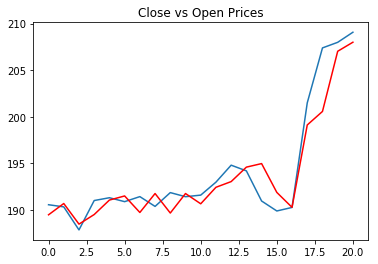

In [66]:
plt.figure
plt.plot(dataDF['Close'])
plt.plot(dataDF['Open'],'r')
plt.title('Close vs Open Prices')
plt.show()

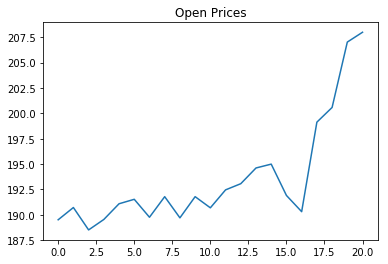

In [65]:
plt.plot(dataDF['Open'])
plt.title('Open Prices')
plt.show()

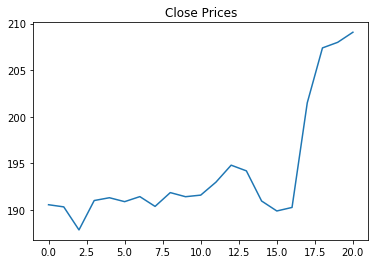

In [67]:
plt.plot(dataDF['Close'])
plt.title('Close Prices')
plt.show()

# plot "same_day_delta"

In [ ]:
plt.plot(dataDF['same_day_delta'])
plt.title('same_day_delta')
plt.show()